# House prices dataset - Ensemble Methods

Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

This is a set of houses with the price they sold for and various features describing the homes e.g. # of bedrooms, lot area etc.  In recent years ensemble methods have proved very effective for both regression and classification problems.  

In [76]:
# Imports
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

In [12]:
# Read in - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv
raw = pd.read_csv('train.csv')

In ensemble learning we can assume nothing about the structure of our data, we can also use categorical features a bit easier than with linear regression.

<Axes: >

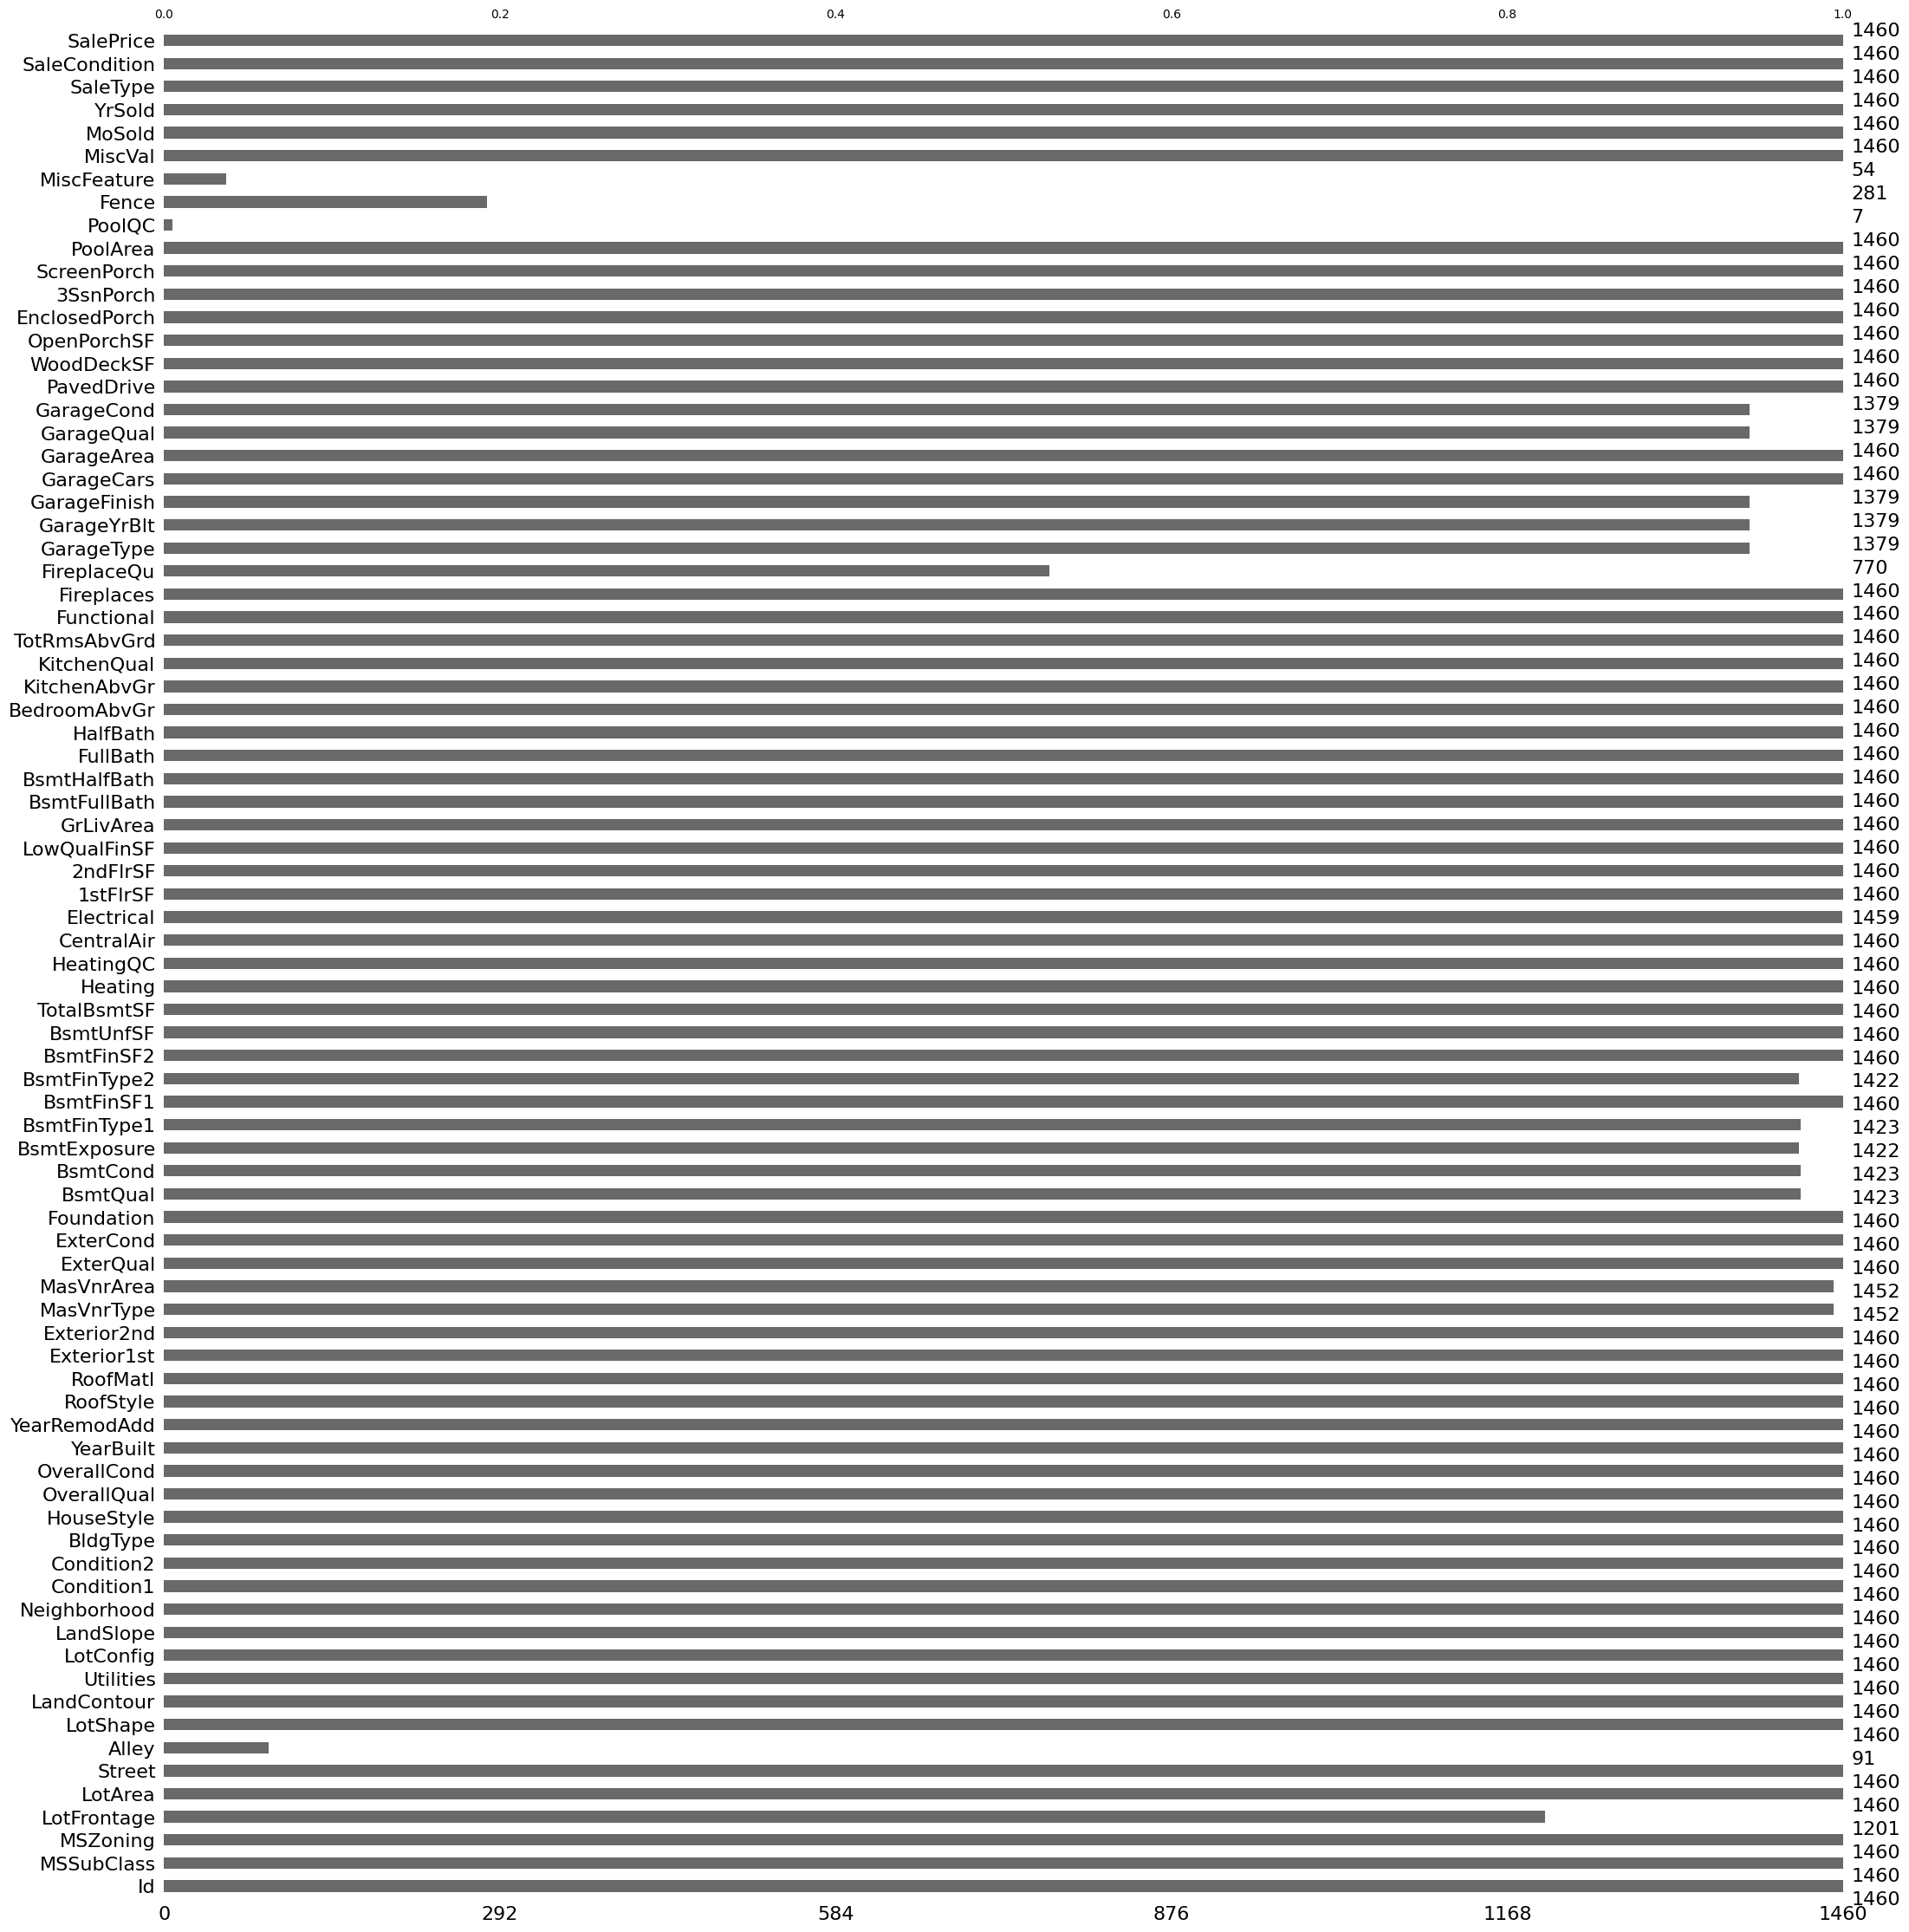

In [13]:
# Inspect n/a's
msno.bar(raw)

LotFrontage is n/a if property is not connected to the street.  Fill na's with 0 or fill with mean/mode as appropriate.  

In [57]:
# Cleaning
clean = raw.copy()
clean.drop('MiscVal', axis=1, inplace=True)
clean[['LotFrontage', 'MasVnrArea']] = clean[['LotFrontage', 'MasVnrArea']].fillna(0)
clean[['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'GarageCond', 'GarageQual', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish']] = clean[['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'GarageCond', 'GarageQual', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish']].fillna('None')
clean['GarageYrBlt'] = clean['GarageYrBlt'].fillna(clean['GarageYrBlt'].mean())
clean['Electrical'] = clean['Electrical'].fillna(clean['Electrical'].mode()[0])

We'll also need to encode our categorical features

In [59]:
# One hot encode features
enc = OneHotEncoder()
y = clean['SalePrice']
X = clean.drop('SalePrice', axis=1)
X = enc.fit_transform(clean).toarray()

Now we fit our models.  For a regression based ensemble approach with have a variety of options such as:
- Gradient Boosting
- Bagging
- Random Forest
- Ada Boost

With more complicated models like this we risk overfitting so we'll use cross validation to better examine performance.

In [79]:
# Fit model's

# XGBoost
XG_model = XGBRegressor()
XG_scores = cross_val_score(XG_model, X, y, scoring='r2', cv=5)

# Gradient Boosting
GB_model = GradientBoostingRegressor()
GB_scores = cross_val_score(GB_model, X, y, cv=5)

# BaggingRegressor
Bag_model = BaggingRegressor()
Bag_scores = cross_val_score(Bag_model, X, y, cv=5)

# RandomForestRegressor
RF_model = RandomForestRegressor()
RF_scores = cross_val_score(RF_model, X, y, cv=5)

# AdaBoostRegressor
Ada_model = RandomForestRegressor()
Ada_scores = cross_val_score(Ada_model, X, y, cv=5)

D = {'XG Boost': np.mean(XG_scores), 'Gradient Boosting':np.mean(GB_scores), 'Bagging': np.mean(Bag_scores), 'Random Forest': np.mean(RF_scores), 'Ada Boosting': np.mean(Ada_scores)}

XG Avg Score: 0.8180640264168089
Gradient Boosting Avg Score: 0.8164084312398966
Bagging Avg Score: 0.7829295939792198
Random Forest Avg Score: 0.7974553761540581
Ada Avg Score: 0.7955531079090765


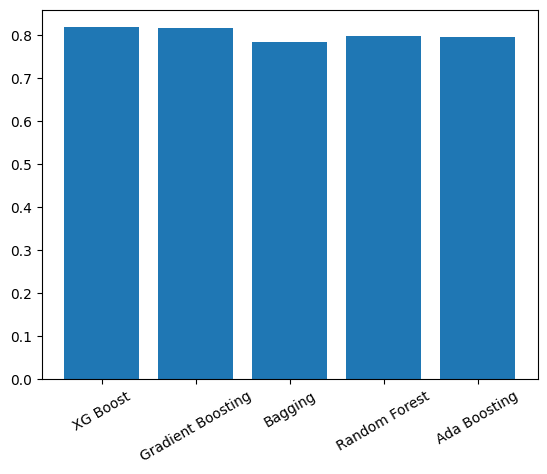

In [82]:
print('XG Avg Score: {}'.format(np.mean(XG_scores)))
print('Gradient Boosting Avg Score: {}'.format(np.mean(GB_scores)))
print('Bagging Avg Score: {}'.format(np.mean(Bag_scores)))
print('Random Forest Avg Score: {}'.format(np.mean(RF_scores)))
print('Ada Avg Score: {}'.format(np.mean(Ada_scores)))
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xticks(rotation=30)
plt.show()

We see that with ensemble techniques we get better overall performance than a linear regression.  With linear regression we saw R^2 scores of 0.71 but with ensemble techniques we're getting scores >0.8.  There are two main reasons for this:
- These methods are using categorical features
- These methods do not assume a purely linear relationships between features